# Imports

In [1]:
import sys, os
# from scipy.stats import norm

In [2]:
sys.path.append(os.path.abspath(os.path.join('../utils')))
from ordinal_model.ordinal_regression import OrdinalRegression, softplus, softplus_inv, plot_model
import autograd.numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from autograd import grad, value_and_grad

In [4]:
from scipy.special import logsumexp

# Ordinal Regression Testing

## Sequence State 2--Gaussian perfect separation

### Toy Data

In [5]:
state_2_df = pd.read_csv('../toydata/simulated_data/features_from_state2.csv')
state_2_df

,temperature_1,temperature_2,ordinal_label
0,13.446886,-0.552414,1
1,12.467339,-0.456510,1
2,12.240646,1.487031,3
3,12.920970,1.347114,3
4,12.365956,-0.505576,1
...,...,...,...
995,13.299201,-1.777017,0
996,12.508565,1.482781,3
997,12.692524,0.986925,2
998,12.897209,-0.374903,1


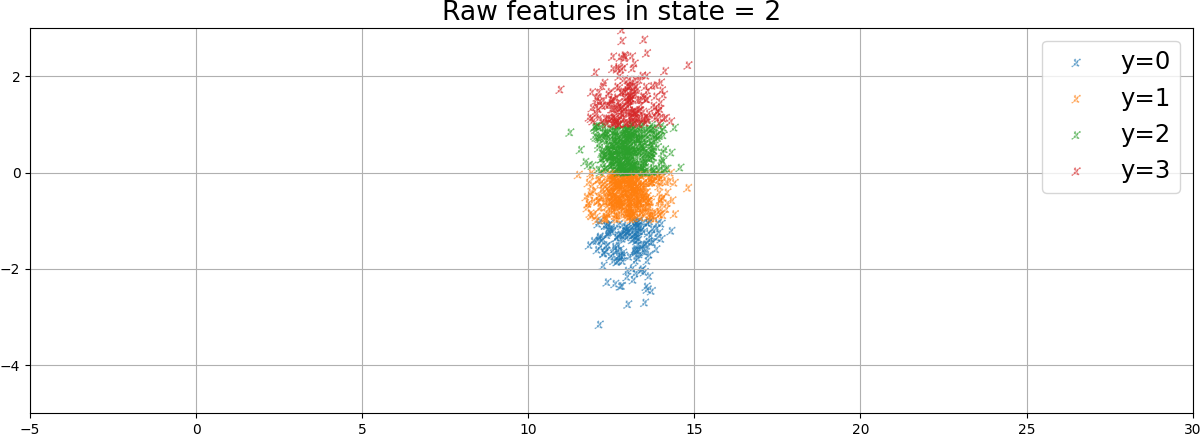

In [6]:
from IPython.display import Image
Image(filename='../toydata/simulated_data/features_from_state_2.png') 

In [7]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = state_2_df[['temperature_1', 'temperature_2']].values
y = state_2_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (1000, 2)
[[13.4468864  -0.55241445]
 [12.46733864 -0.45650953]
 [12.24064581  1.48703067]
 ...
 [12.69252415  0.9869254 ]
 [12.89720911 -0.37490277]
 [14.0738536   1.12059795]]
y: (1000,)
[1 1 3 3 1 2 2 1 0 1 2 1 1 2 1 3 2 2 1 0 0 2 2 1 2 1 1 0 2 2 0 0 2 2 1 2 0
 2 2 2 1 3 0 1 1 0 3 1 3 1 3 1 0 2 1 2 2 1 2 2 2 1 3 2 1 0 0 1 1 1 3 1 1 1
 0 2 1 1 2 3 1 2 2 1 2 2 3 1 0 1 0 1 1 2 2 0 0 0 1 2 2 2 2 2 1 0 2 1 3 2 1
 2 3 1 3 3 2 2 0 2 2 0 3 1 3 1 2 1 0 1 2 1 1 2 0 2 2 2 2 1 2 2 1 1 1 3 3 1
 3 3 3 0 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1 1 1 1 2 1 1 2 3 3 0 1 2 2 0 2 0 2 2
 2 2 1 1 2 3 2 1 1 0 1 2 2 2 0 1 2 0 1 2 2 1 1 2 1 2 3 0 1 3 2 0 2 1 1 0 2
 3 2 1 2 3 2 3 3 2 1 1 3 3 1 0 2 1 2 1 1 1 3 1 2 3 2 1 3 1 3 0 1 3 2 0 1 3
 1 3 2 3 0 2 2 1 1 1 1 3 2 1 2 2 1 3 3 2 2 2 1 3 1 0 1 2 1 3 2 1 2 3 0 3 2
 3 2 1 2 1 0 1 2 0 2 1 2 1 2 1 2 2 2 3 2 1 1 1 0 3 2 2 2 1 3 2 0 2 1 3 2 3
 1 1 3 3 1 0 3 2 1 0 2 2 1 3 2 2 2 3 3 3 2 0 2 1 3 1 0 3 1 1 1 2 1 2 0 3 2
 1 3 0 3 3 2 3 1 2 3 2 2 2 1 1 1 3 0 0 2 2 1 0 2 2 3 2 2 0

## Model

BEST noise:
1.0
BEST deltas:
[7.5174523  7.52649503]
BEST cutpoints:
[-7.50149448  0.01595782  7.54245285]
BEST weights:
[1.10150982e-04 3.97441429e-03 7.45200241e+00]
[[2.92622661e-04 9.99684962e-01 2.27151115e-05 1.00000000e-07]
 [1.67786894e-05 9.99605128e-01 3.78393299e-04 1.00000000e-07]
 [1.00000000e-07 1.00000000e-07 1.66927669e-04 9.99833272e-01]
 ...
 [1.00000000e-07 1.00000074e-07 5.54613887e-01 4.45386313e-01]
 [1.07235242e-06 9.97094564e-01 2.90466321e-03 1.00000000e-07]
 [1.00000000e-07 1.00000000e-07 1.93714056e-01 8.06286144e-01]]
[1 1 3 3 1 2 2 1 0 1 2 1 1 2 1 3 2 2 1 0 0 2 2 1 2 1 1 0 2 2 0 0 2 2 1 2 0
 2 2 2 1 3 0 1 1 0 3 1 3 1 3 1 0 2 1 2 2 1 2 2 2 1 3 2 1 0 0 1 1 1 3 1 1 1
 0 2 1 1 2 3 1 2 2 1 2 2 3 1 0 1 0 1 1 2 2 0 0 0 1 2 2 2 2 2 1 0 2 1 3 2 1
 2 3 1 3 3 2 2 0 2 2 0 3 1 3 1 2 1 0 1 2 1 1 2 0 2 2 2 2 1 2 2 1 1 1 3 3 1
 3 3 2 0 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1 1 1 1 2 1 1 2 3 3 0 1 2 2 0 2 0 2 2
 2 2 1 1 2 3 2 1 1 0 1 2 2 2 0 1 2 0 1 2 2 1 1 2 1 2 3 0 1 3 2 1 2 1 1 0 

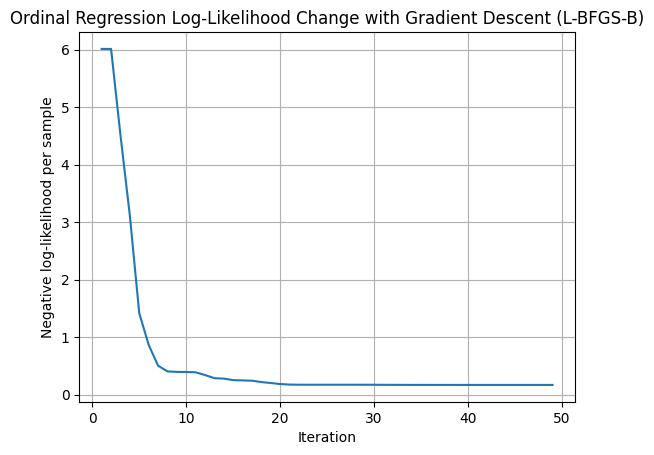

In [8]:
clf = OrdinalRegression(noise_stdev=1, C=1, save_loss=True, random_state=10, log_training=True)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

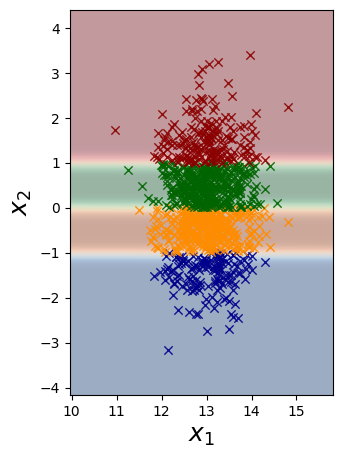

In [9]:
plot_model(clf)

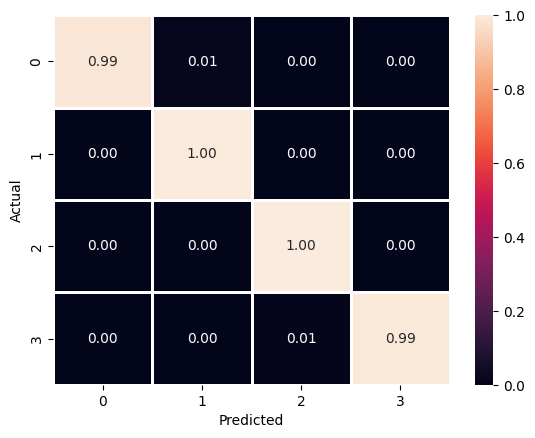

In [10]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

In [11]:
clf.grid_search_variance()

AttributeError: 'OrdinalRegression' object has no attribute 'grid_search_variance'

## Sequence State 2--Gaussian with label noise

### Toy Data

In [ ]:
state_2_with_noise_df = pd.read_csv('../toydata/simulated_data/features_from_state2_with_noise.csv')
state_2_with_noise_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/simulated_data/features_from_state2_with_noise.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = state_2_with_noise_df[['temperature_1', 'temperature_2']].values
y = state_2_with_noise_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

### Model

In [ ]:
clf = OrdinalRegression(noise_variance = None, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Crescent Shapes

### Toy Data

In [12]:
cresent_df = pd.read_csv('../toydata/ordinal_data/crescent_shapes_4_labels.csv')
cresent_df

,x1,x2,label
0,0.941574,0.505779,0.0
1,-1.092763,-0.005928,0.0
2,0.439351,-0.509177,0.0
3,0.187745,0.076755,0.0
4,0.003034,-0.123461,0.0
...,...,...,...
2480,3.568087,0.585072,3.0
2481,6.732316,-0.126761,3.0
2482,6.684452,-0.217130,3.0
2483,6.921550,-1.518566,3.0


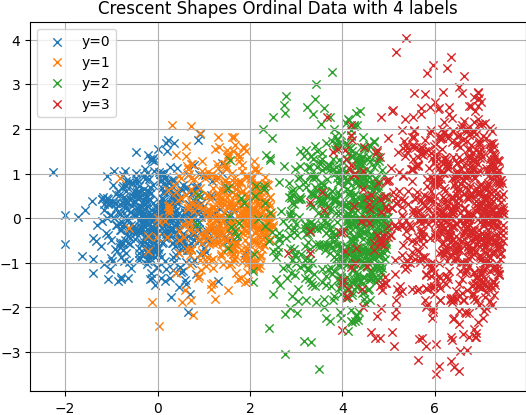

In [13]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/crescent_shapes_4_labels.png') 

In [14]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = cresent_df[['x1', 'x2']].values
y = cresent_df['label'].values.astype(int)
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (2485, 2)
[[ 9.41573847e-01  5.05778613e-01]
 [-1.09276303e+00 -5.92827714e-03]
 [ 4.39350881e-01 -5.09177383e-01]
 ...
 [ 6.68445210e+00 -2.17130055e-01]
 [ 6.92155034e+00 -1.51856577e+00]
 [ 6.84851267e+00  9.15530483e-01]]
y: (2485,)
[0 0 0 ... 3 3 3]


### Model

[[4.07538121e-01 5.90811148e-01 1.65103110e-03 1.00000020e-07]
 [9.99886062e-01 1.14138368e-04 1.00003498e-07 1.00000000e-07]
 [7.76387086e-01 2.23571005e-01 4.22084089e-05 1.00000000e-07]
 ...
 [1.00000000e-07 1.00000000e-07 2.90083972e-04 9.99710116e-01]
 [1.00000000e-07 1.00000000e-07 5.74082479e-05 9.99942792e-01]
 [1.00000000e-07 1.00000000e-07 7.56660706e-05 9.99924534e-01]]
[1 0 0 ... 3 3 3]


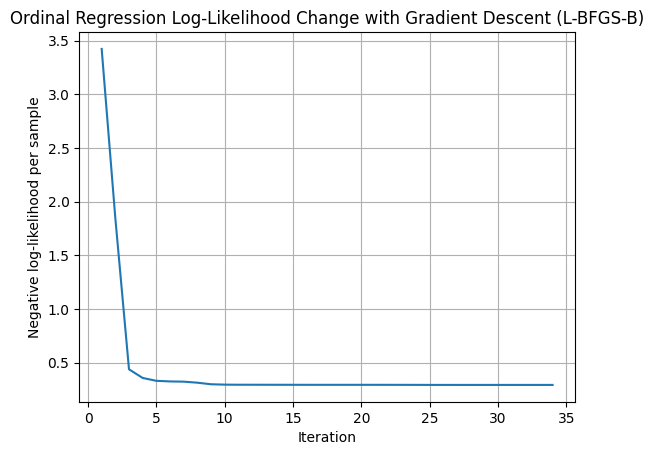

In [16]:
clf = OrdinalRegression(noise_stdev= 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

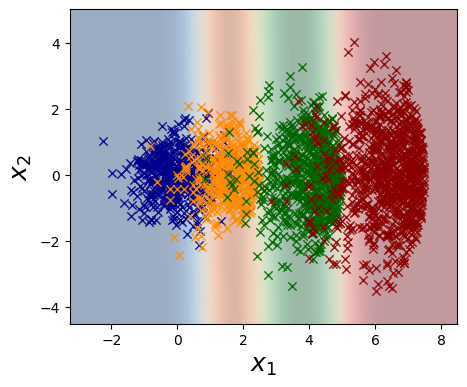

In [17]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Concentric Circles

### Toy Data, Point Density Factor = 1

In [ ]:
circles_df = pd.read_csv('../toydata/ordinal_data/concentric_circles_4_labels_1.0_densityfactor.csv')
circles_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/concentric_circles_4_labels_1.0_densityfactor.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = circles_df[['x1', 'x2']].values
y = circles_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

### Model

In [ ]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Concentric Semi Circles

### Toy Data, Point Density Factor = 1

In [18]:
semi_circles_df = pd.read_csv('../toydata/ordinal_data/concentric_semi_circles_4_labels_1_densityfactor.csv')
semi_circles_df

,x1,x2,ordinal_label
0,0.375490,0.153511,0
1,0.006069,-0.246922,0
2,0.323332,0.629520,0
3,0.187678,-0.673366,0
4,0.565982,-0.477484,0
...,...,...,...
901,1.991824,2.656294,3
902,0.417112,-4.132877,3
903,0.126958,-4.188304,3
904,3.573747,0.681222,3


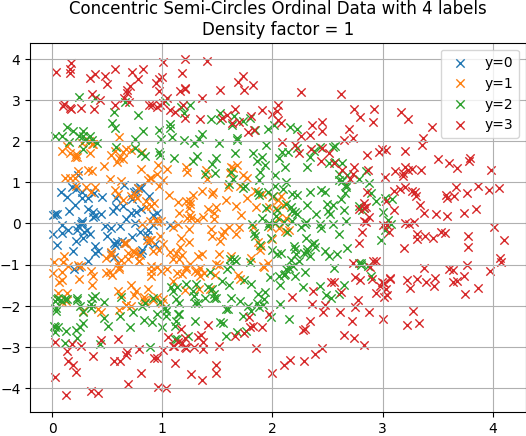

In [19]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/concentric_semi_circles_4_labels_1_densityfactor.png') 

In [20]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = semi_circles_df[['x1', 'x2']].values
y = semi_circles_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (906, 2)
[[ 0.37549009  0.1535108 ]
 [ 0.006069   -0.24692199]
 [ 0.32333183  0.62951965]
 ...
 [ 0.12695832 -4.18830444]
 [ 3.5737472   0.68122152]
 [ 2.79673792  2.60042228]]
y: (906,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

### Model

[[2.08373223e-01 4.31769423e-01 2.85698062e-01 7.41596929e-02]
 [2.96414778e-01 4.41255292e-01 2.19870832e-01 4.24594978e-02]
 [2.18780722e-01 4.34650666e-01 2.77299603e-01 6.92694092e-02]
 ...
 [2.74411089e-01 4.41722261e-01 2.35212937e-01 4.86541134e-02]
 [7.00729724e-04 2.08116810e-02 1.52913870e-01 8.25574120e-01]
 [4.28606556e-03 6.81685806e-02 2.82828045e-01 6.44717709e-01]]
[1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 3 1 1 2 2 3 2 1 2 1 2 1 2 2 2 2 1 2 2 2 1 2 1 1 1 1 1 2 1
 2 1 2 2 1 2 2 2 1 2 1 1 1 1 2 1 3 2 1 2 2 2 1 2 3 1 2 1 1 1 2 2 2 1 1 2 2
 1 1 2 2 1 1 2 1 2 2 1 2 2 2 3 1 1 2 2 2 1 1 1 2 1 1 1 2 1 2 3 1 2 1 2 2 1
 2 1 1 2 3 1 2 1 1 1 2 1 1 2 1 3 3 1 2 1 1 1 1 1 2 2 1 2 2 1 2 2 2 2 1 2 2
 2 2 2 1 1 1 1 2 1 1 2 2 1 1 2 1 1 1 2 2 1 2 1 2 2 3 1 3 1 3 2 1 2 1 2 1 1
 2 1 2 1 2 1 1 2 1 1 2 2 2 1 1 1 2 2 2 2 1 1 1 1 1 2 1 1 2 2 2 1 2 1 1 2 1
 2 2 2 2 2 1 3 1

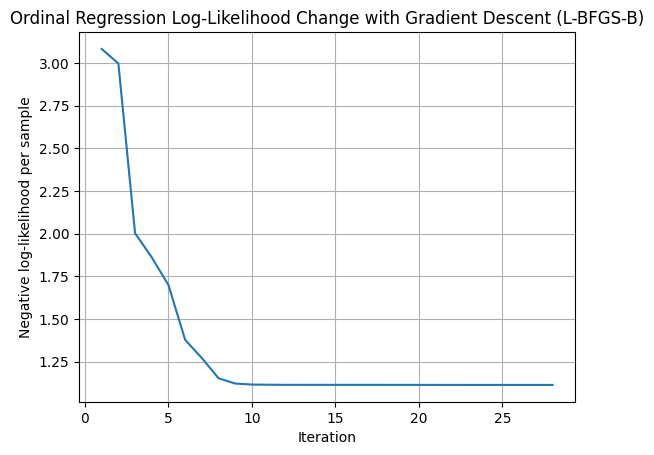

In [22]:
clf = OrdinalRegression(noise_stdev=1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

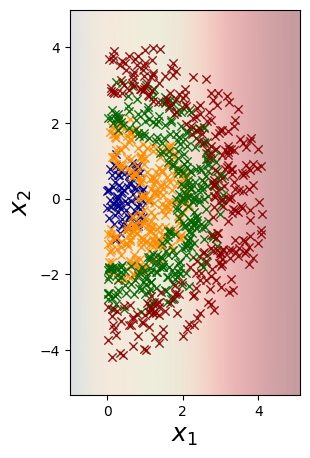

In [23]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

## Stacked Gaussians

### Toy Data, Point Density Factor = 1, Mean scale = 4

In [5]:
stacked_gaussian_df = pd.read_csv('../toydata/ordinal_data/stacked_gaussian_4_labels_1_densityfactor.csv')
stacked_gaussian_df

,x1,x2,ordinal_label
0,0.715279,1.883148,0
1,-0.008384,-2.185526,0
2,-0.720086,0.878702,0
3,0.108549,0.375490,0
4,-0.174600,0.006069,0
...,...,...,...
1995,1.150269,13.570840,3
1996,0.488751,12.953526,3
1997,-1.498064,12.627589,3
1998,1.287536,13.271711,3


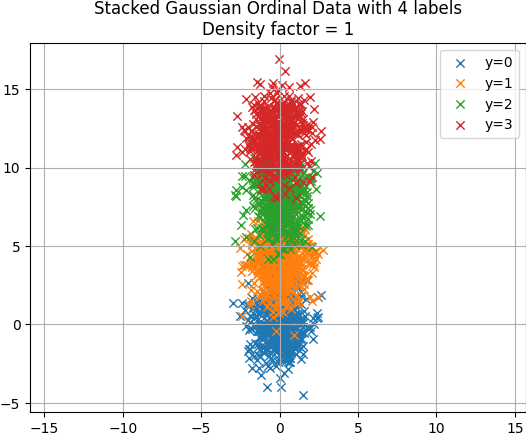

In [6]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/stacked_gaussian_4_labels_1_densityfactor.png') 

In [7]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = stacked_gaussian_df[['x1', 'x2']].values
y = stacked_gaussian_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

X: (2000, 2)
[[ 7.15278974e-01  1.88314769e+00]
 [-8.38384993e-03 -2.18552605e+00]
 [-7.20085561e-01  8.78701761e-01]
 ...
 [-1.49806385e+00  1.26275894e+01]
 [ 1.28753594e+00  1.32717106e+01]
 [-5.48980805e-02  1.09671385e+01]]
y: (2000,)
[0 0 0 ... 3 3 3]


### Model

In [9]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

ValueError: object arrays are not supported

In [16]:
log_proba = clf.predict_log_proba(X)
type(proba)

numpy.ndarray

In [19]:
logsumexp(log_proba, axis=1)

array([ 1.11022302e-16,  4.58617519e-17,  0.00000000e+00, ...,
        5.20417043e-18, -8.98261500e-17,  8.32667268e-17])

In [16]:
np.log(np.sum(proba, axis=1))

array([3.9999992e-07, 3.9999992e-07, 3.9999992e-07, ..., 3.9999992e-07,
       3.9999992e-07, 3.9999992e-07])

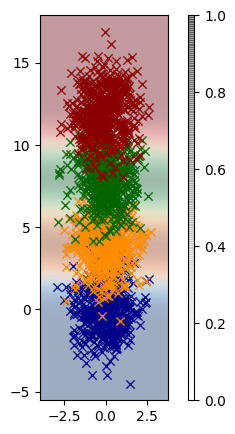

In [9]:
plot_model(clf)

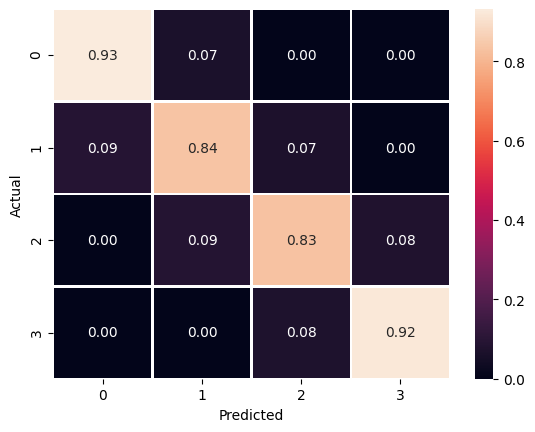

In [10]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

In [ ]:
min_variance = clf.find_global_minimum_variance(iter=50)

### Toy Data, Point Density Factor = 0.5, Mean scale = 2

In [ ]:
stacked_gaussian_df = pd.read_csv('../toydata/ordinal_data/stacked_gaussian_4_labels_0.5_densityfactor_2_meanscale.csv')
stacked_gaussian_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/stacked_gaussian_4_labels_0.5_densityfactor_2_meanscale.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = stacked_gaussian_df[['x1', 'x2']].values
y = stacked_gaussian_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

### Model

In [ ]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

In [ ]:
min_variance = clf.find_global_minimum_variance()

In [ ]:
clf.grid_search_variance()

## Concentric Semi Circles

### Toy Data, Point Density Factor = 1

In [ ]:
semi_circles_df = pd.read_csv('../toydata/ordinal_data/concentric_semi_circles_4_labels_1_densityfactor.csv')
semi_circles_df

In [ ]:
from IPython.display import Image
Image(filename='../toydata/ordinal_data/concentric_semi_circles_4_labels_1_densityfactor.png') 

In [ ]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(state_2_df[['temperature_1', 'temperature_2']].values)
X = semi_circles_df[['x1', 'x2']].values
y = semi_circles_df['ordinal_label'].values
print(f'X: {X.shape}')
print(X)
print(f'y: {y.shape}')
print(y)

### Model

In [11]:
clf = OrdinalRegression(noise_variance = 1, C=1, save_loss=True, random_state=10)
clf.fit(X, y)
proba = clf.predict_proba(X)
y_predict = clf.predict(X)
print(proba)
print(y_predict)

ValueError: object arrays are not supported

In [ ]:
plot_model(clf)

In [ ]:
cf_matrix = confusion_matrix(y, y_predict, normalize='true',labels=list(range(y.max()+1))) 

ax = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='.2f')
ax.set_ylabel(f'Actual')
ax.set_xlabel(f'Predicted')
plt.show()

# Misc. Testing

In [ ]:
X = np.array(
    [
        [-80,-90,-100],
        [4,5,6],
        [80,90,100],
        [-81,-93,-99],
        [4.2,5.1,6.3],
        [81,93,99],
        [-87,-94,-98],
        [4.1,5.2,6.5],
        [87,94,98],
    ]
)
y = np.array(
    [
        0,
        1,
        2,
        0,
        1,
        2,
        0,
        1,
        2,
    ]
)
w_inits = []
for i in range(100):
    w_inits.append(np.random.rand(3) * np.random.randint(0,10))

In [ ]:
clf = OrdinalRegression()
clf.set_params(R = 3, N = 3, cut_points  = np.array([-np.inf, -3, 3, np.inf]))

In [ ]:
# for w in w_inits:
#     print(clf.log_likelihood(w, X, y))

In [ ]:
clf.fit(X, y)

In [ ]:
best_w = clf.w

In [ ]:
clf.predict(X)

## Softplus

In [ ]:
test_arr = np.absolute(np.random.normal(size=3))
print(test_arr)
inverse_arr = softplus_inv(test_arr)
print(inverse_arr)
recovered = softplus(inverse_arr)
print(recovered)

In [ ]:
softplus_inv(0.5969)

In [ ]:
softplus(np.array([1,2,3]))

In [ ]:
arr = np.array([1,2,10, 50])

In [ ]:
arr.shape

In [ ]:
softplus(arr)

In [ ]:
np.array(1)[np.newaxis].shape